<a href="https://colab.research.google.com/github/beatricexc/Financial-sentiment-analysis/blob/main/Financial_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import nltk
import pandas as pd
import pandas_profiling
import re
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud  import WordCloud
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from PIL import Image

## Loading the data

In [48]:
data = pd.read_csv('/content/financialsentiment.csv')
df = data.copy()

## EDA

In [49]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [50]:
df.duplicated().value_counts()

False    5836
True        6
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


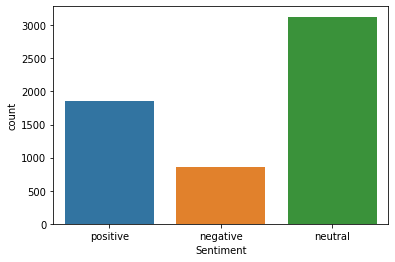

In [57]:
#no null values

sns.countplot(df['Sentiment'])
plt.show()

In [9]:
# Deleting the elements from the neutral class

In [12]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [13]:
df.shape

(5842, 2)

In [14]:
# function that takes a column and does preprocessing of text sentences
def cleaning(df1):
    lowered=df1.lower()    # lowering the sentences 
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords from list
    df1=' '.join(df1) # joining back the words of list
    return(df1) # returning the cleaned words


In [15]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
df['Sentence']=df['Sentence'].apply(cleaning)

In [17]:
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps ...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubl...,positive
3,according finnish russian chamber commerce m...,neutral
4,swedish buyout firm sold remaining percen...,neutral


In [18]:
df.shape

(5842, 2)

In [19]:
# generating word cloud
# we need a corpus of all of the sentences
# we then observe the most frequent word in all of the sentences

# joining all the sentences
corpus = ' '.join(df['Sentence'])


In [20]:
# generating word cloud
word_cloud = WordCloud().generate(corpus)

In [21]:
img = word_cloud.to_image()

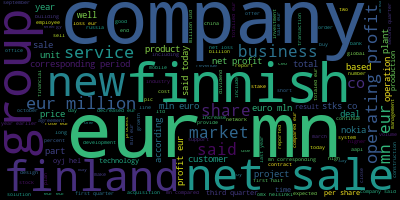

In [22]:
img

## Making a Document Term Matrix

In [23]:
#  for tfidf vectorizer

tfidf = TfidfVectorizer()
data = tfidf.fit_transform(df['Sentence'])
df_dtm = pd.DataFrame(data.toarray(), columns = tfidf.get_feature_names())

In [24]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_dtm.shape

(5842, 9297)

In [25]:
df.shape

(5842, 2)

In [26]:
df.index

RangeIndex(start=0, stop=5842, step=1)

In [25]:
df_dtm["Sentiment"]=df['Sentiment']

## Label Encoding 

- enconding the target variable
- ML only understands numerical value

In [26]:
le=LabelEncoder()
df_dtm['Sentiment']=le.fit_transform(df_dtm['Sentiment'])

In [27]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [29]:
le_name_mapping

{'negative': 0, 'neutral': 1, 'positive': 2}

## Train, test, split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_dtm.drop('Sentiment', axis = 1), df_dtm['Sentiment'],test_size =0.1,stratify =df_dtm['Sentiment'])

In [31]:
X_train.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_test

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
3849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA for dimensionality reduction 

- necessary because the number of columns is exceeding the number of rows.

In [33]:
from sklearn.decomposition import PCA

In [34]:
#converting into 3000 columns

pca =PCA(n_components = 3000)

In [35]:
X_train = pca.fit_transform(X_train)

In [36]:
X_train.shape

(5257, 3000)

In [37]:
X_test = pca.transform(X_test)

## Training

In [ ]:
# SVM models work good in text date (says this person)

In [38]:
svc = SVC(kernel ='linear')

In [39]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = svc.predict(X_test)

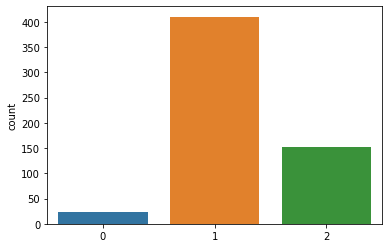

In [58]:
sns.countplot(y_pred)
plt.show()

In [61]:
confusion_matrix(y_test,y_pred)


array([[ 11,  56,  19],
       [ 12, 284,  17],
       [  0,  70, 116]])

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
svc.score(X_test,y_test)

0.7025641025641025